# Задание 3

Теперь предлагаем вам посмотреть на нашу аудиторию немного под другим углом — давайте посчитаем не просто всех пользователей, а именно ту часть, которая оформляет и оплачивает заказы в нашем сервисе. Заодно выясним, какую долю платящие пользователи составляют от их общего числа.



Задание:

Для каждого дня, представленного в таблицах user_actions и courier_actions, рассчитайте следующие показатели:

1. Число платящих пользователей.
2. Число активных курьеров.
3. Долю платящих пользователей в общем числе пользователей на текущий день.
4. Долю активных курьеров в общем числе курьеров на текущий день.
Колонки с показателями назовите соответственно paying_users, active_couriers, paying_users_share, active_couriers_share. Колонку с датами назовите date. Проследите за тем, чтобы абсолютные показатели были выражены целыми числами. Все показатели долей необходимо выразить в процентах. При их расчёте округляйте значения до двух знаков после запятой.

Результат должен быть отсортирован по возрастанию даты. 

Поля в результирующей таблице: date, paying_users, active_couriers, paying_users_share, active_couriers_share

```sql
WITH new_us AS (
  SELECT
    ua.time :: date AS date,
    COUNT(DISTINCT ua.user_id) AS new_users
  FROM
    user_actions ua
  WHERE
    (ua.time :: date, ua.user_id) IN (
      SELECT
        MIN(time :: date),
        user_id
      FROM
        user_actions
      GROUP BY
        user_id
    )
  GROUP BY
    1
),
new_cour AS (
  SELECT
    ca.time :: date AS date,
    COUNT(DISTINCT ca.courier_id) AS new_couriers
  FROM
    courier_actions ca
  WHERE
    (ca.time :: date, ca.courier_id) IN (
      SELECT
        MIN(time :: date),
        courier_id
      FROM
        courier_actions
      GROUP BY
        courier_id
    )
  GROUP BY
    1
),
subq AS (
  SELECT
    *,
    (
      SUM(new_users) over(
        ORDER BY
          date
      )
    ) :: int AS total_users,
    (
      SUM(new_couriers) over(
        ORDER BY
          date
      )
    ) :: int AS total_couriers
  FROM
    new_us
    JOIN new_cour using (date)
  ORDER BY
    date
),
pay_us AS (
  SELECT
    ua.time :: date AS date,
    COUNT(DISTINCT ua.user_id) AS paying_users
  FROM
    user_actions ua
  WHERE
    order_id NOT IN (
      SELECT
        order_id
      FROM
        user_actions
      WHERE
        action = 'cancel_order'
    )
  GROUP BY
    1
),
act_cour AS (
  SELECT
    ca.time :: date AS date,
    COUNT(DISTINCT ca.courier_id) AS active_couriers
  FROM
    courier_actions ca
  WHERE
    order_id NOT IN (
      SELECT
        order_id
      FROM
        user_actions
      WHERE
        action = 'cancel_order'
    )
  GROUP BY
    1
),
total_us AS (
  SELECT
    time :: date AS date,
    COUNT(DISTINCT user_id) AS total_users
  FROM
    user_actions
  GROUP BY
    1
),
total_co AS (
  SELECT
    time :: date AS date,
    COUNT(DISTINCT courier_id) AS total_couriers
  FROM
    courier_actions
  GROUP BY
    1
)
SELECT
  date,
  paying_users,
  active_couriers,
  ROUND(paying_users :: decimal / total_users * 100, 2) AS paying_users_share,
  ROUND(
    active_couriers :: decimal / total_couriers * 100,
    2
  ) AS active_couriers_share
FROM
  pay_us
  JOIN act_cour using (date)
  JOIN subq using (date)
```

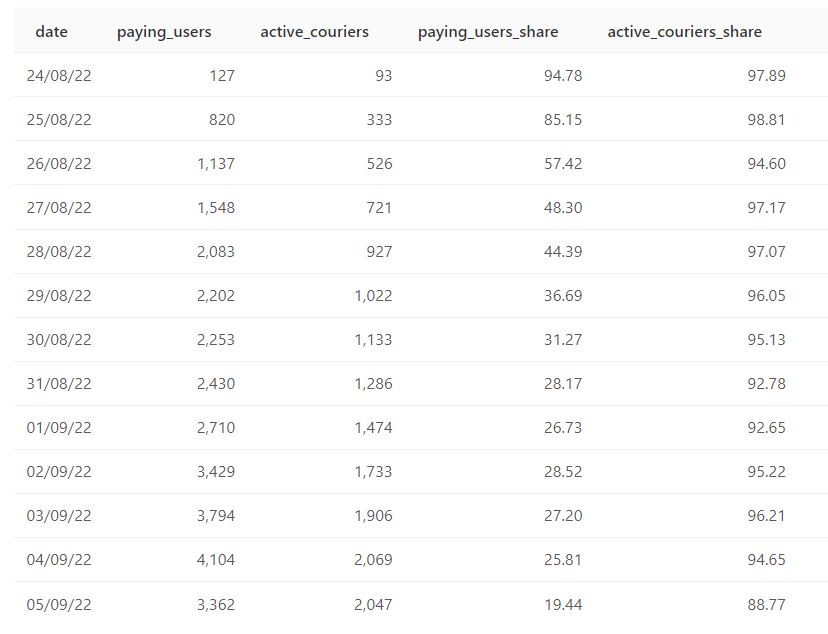

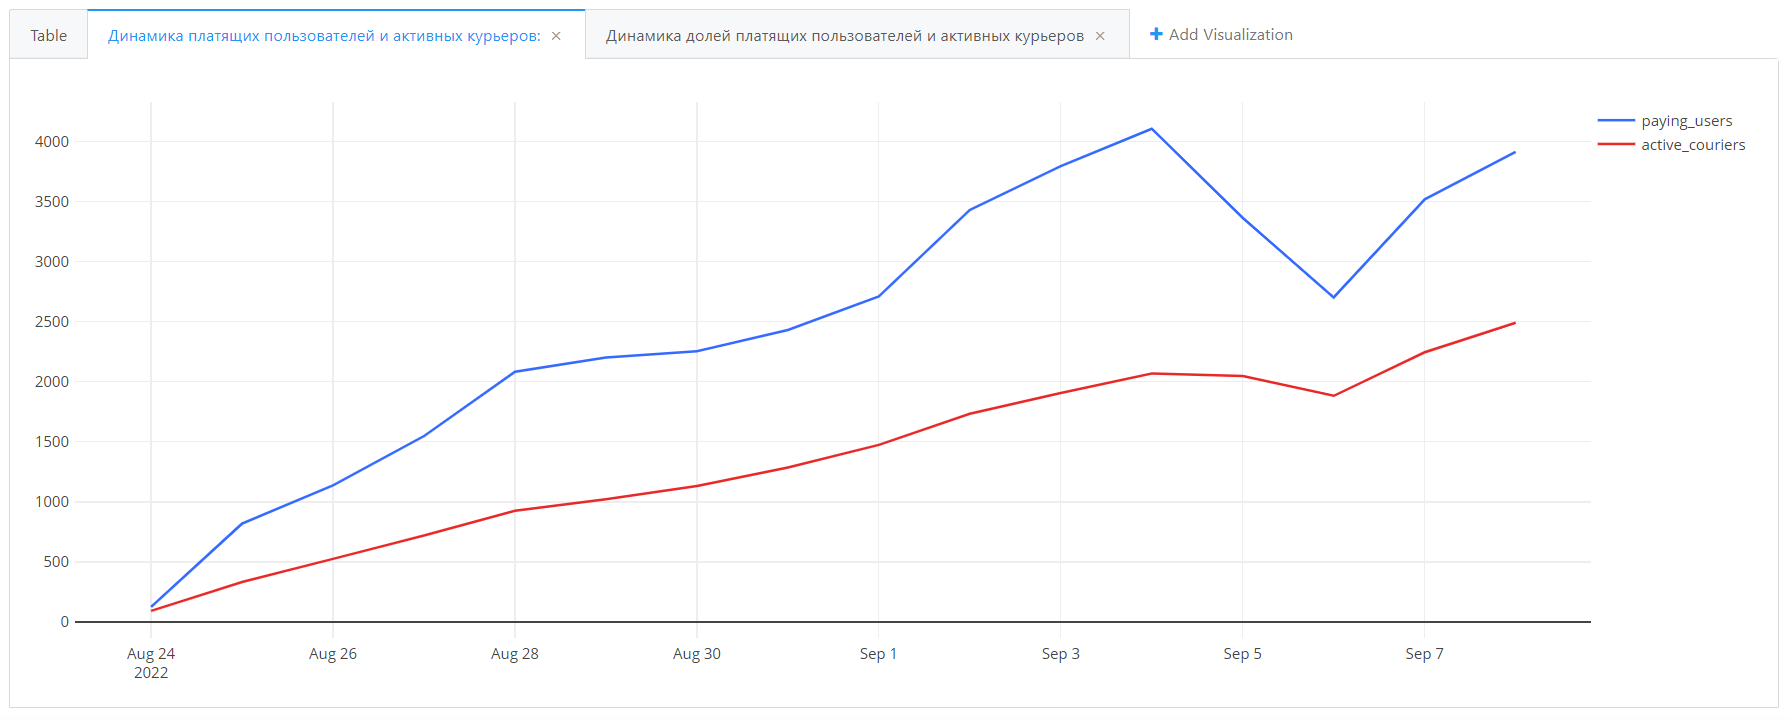

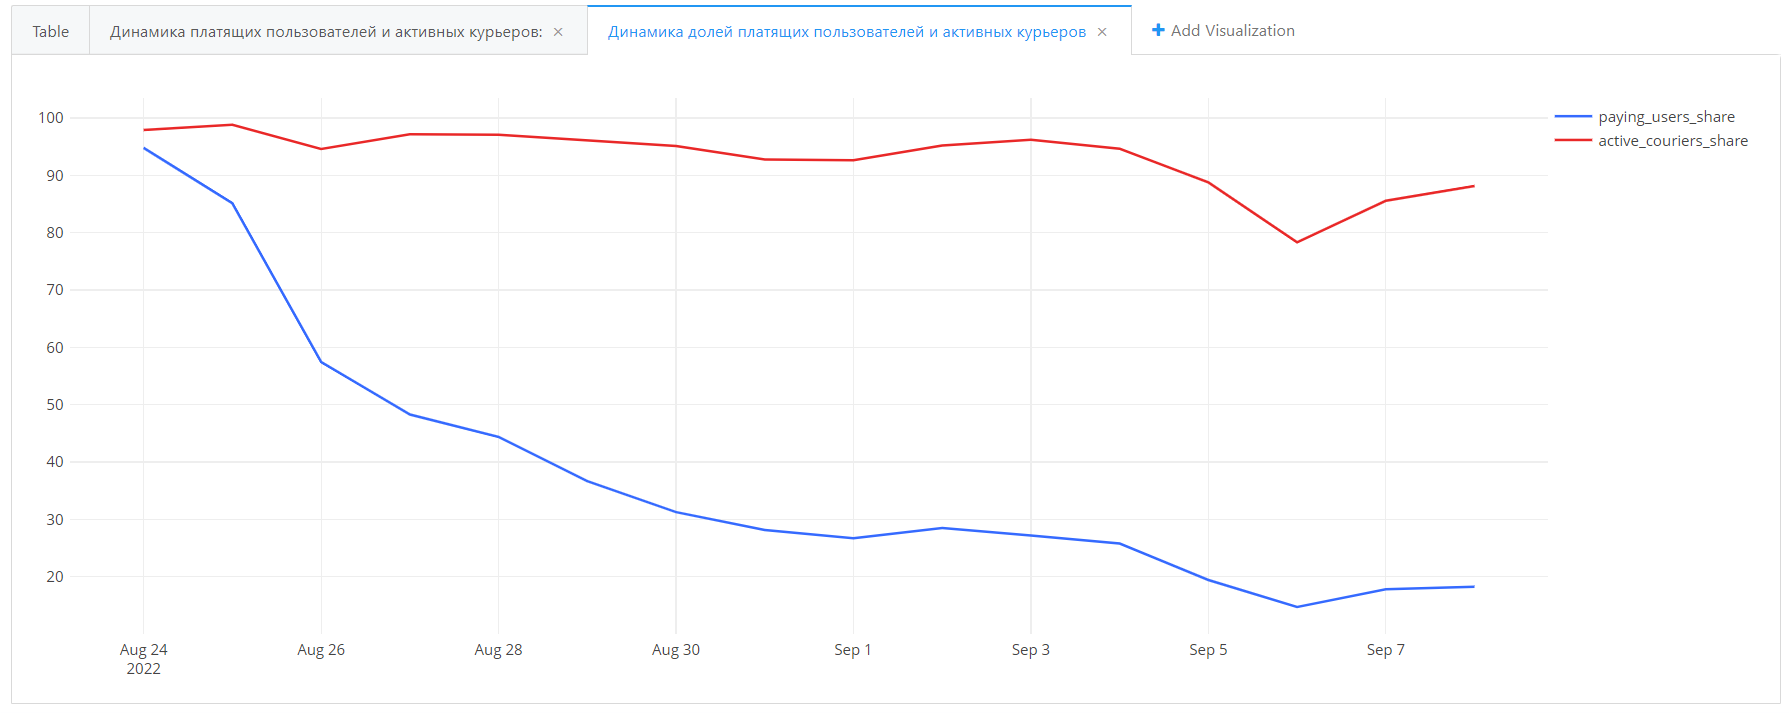